In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
# Read in transactions data -- parse dates specified here for help with later problem

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: >

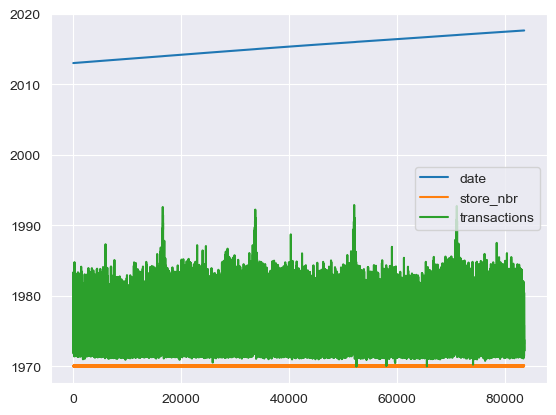

In [4]:
transactions.plot()#this is too messy with date and store number creating confusion

<Axes: xlabel='date'>

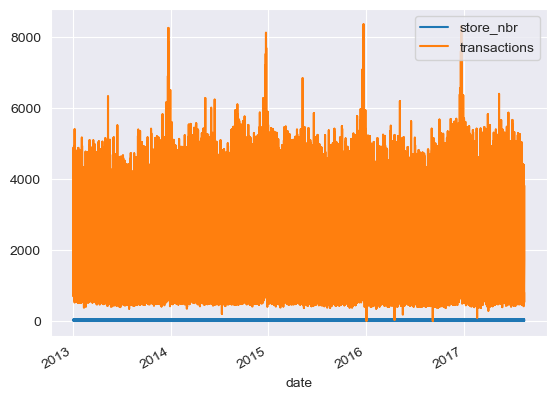

In [5]:
transactions.set_index('date').plot()
#by setting the index we minimize some of the mess,but still need more cleaning

<Axes: xlabel='date'>

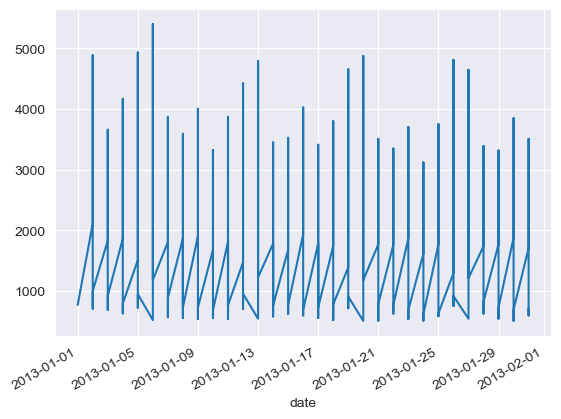

In [6]:
transactions.set_index('date').loc['2013-01', 'transactions'].plot()
#using '.loc' to fliter futher

<Axes: xlabel='date'>

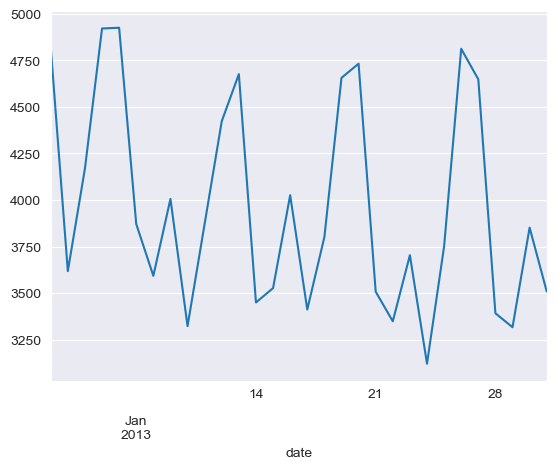

In [7]:
transactions.query('store_nbr == 44').set_index('date').loc['2013-01', 'transactions'].plot()
#by adding a 'query' we can filter down to a specific store

In [8]:
# cleaning the code up some by setting up the data frame you want
transactions_44 = transactions.loc[transactions['store_nbr'] == 44, ['date', 'transactions']]

transactions_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


<Axes: title={'center': 'Store 44 Transactions 2013-2017'}, xlabel='Date', ylabel='Daily Transactions'>

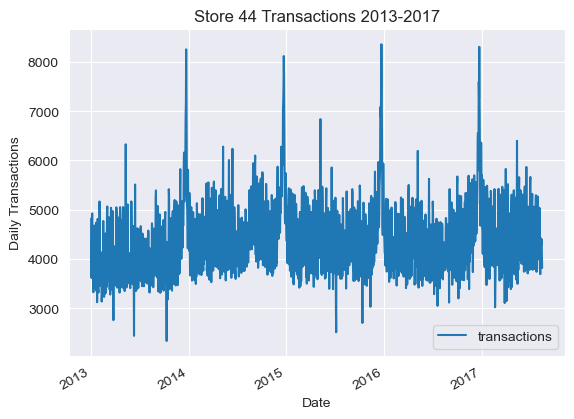

In [9]:
transactions_44.set_index('date').plot(
    title= "Store 44 Transactions 2013-2017",
    xlabel= 'Date',
    ylabel= 'Daily Transactions',
    #color="Green",
    cmap='tab10'
)

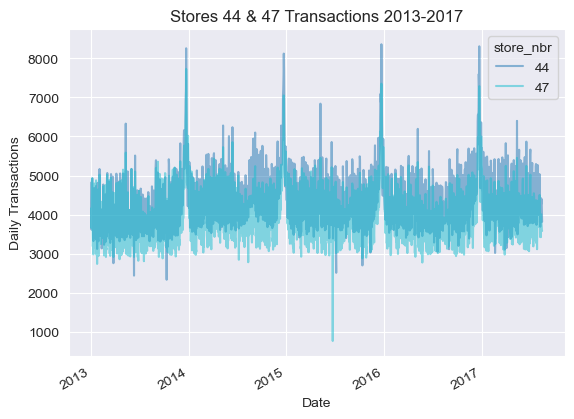

In [10]:
#plotting multiple values
(transactions
 .query('store_nbr in [44,47]')
 .pivot_table(index='date', columns = 'store_nbr')
 .droplevel(0,axis=1)
 .plot(
    title= "Stores 44 & 47 Transactions 2013-2017",
    xlabel= 'Date',
    ylabel= 'Daily Transactions',
    #color=["Orange", "Red"],
     cmap='tab10',
     alpha=.5
 )
);
# by adding the';' to the end,you eliminate the notation at the top of the plotted chart (i.e."<Axes: xlabel='date'>")
# "color" and "cmap" cannot be used at the same time!
#"alpha" ranges from "0" to "1" and determines trnsparency

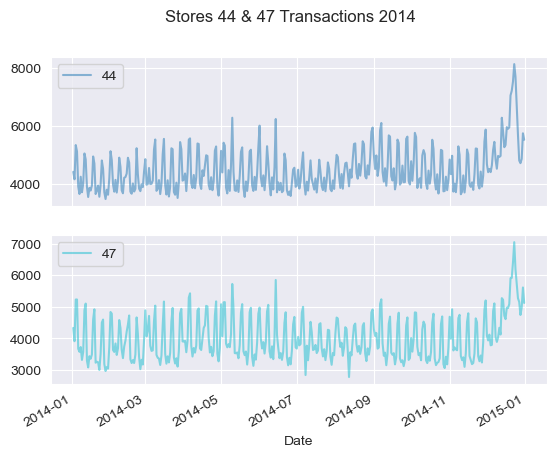

In [11]:
# Using subplots
(transactions
 .query('store_nbr in [44,47] and date.dt.year ==2014')
 .pivot_table(index='date', columns = 'store_nbr')
 .droplevel(0,axis=1)
 .plot(
    title= "Stores 44 & 47 Transactions 2014",
    xlabel= 'Date',
    #ylabel= 'Daily Transactions',
    #color=["Orange", "Red"],
     cmap='tab10',
     alpha=.5,
     subplots=True
 )
);

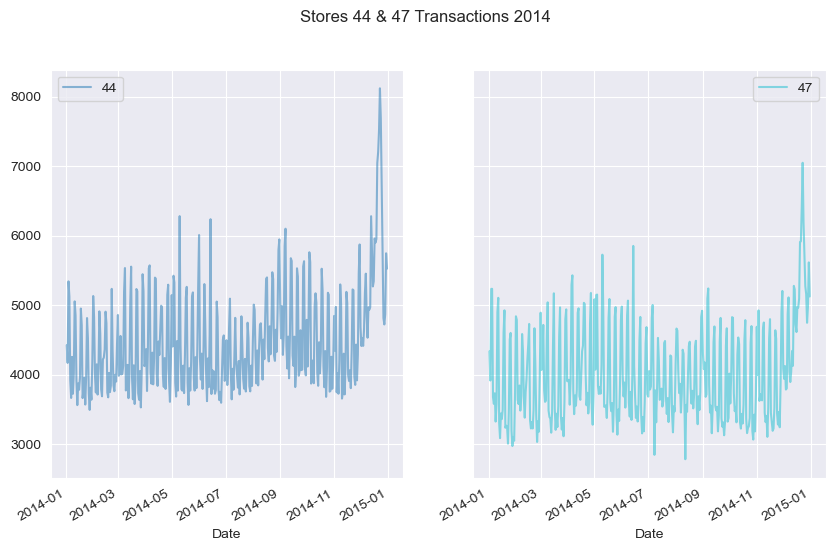

In [12]:
# Adding in layout and sharey
(transactions
 .query('store_nbr in [44,47] and date.dt.year ==2014')
 .pivot_table(index='date', columns = 'store_nbr')
 .droplevel(0,axis=1)
 .plot(
    title= "Stores 44 & 47 Transactions 2014",
    xlabel= 'Date',
    #ylabel= 'Daily Transactions',
    #color=["Orange", "Red"],
     cmap='tab10',
     alpha=.5,
     subplots=True,
     layout=(1,2),
     sharey=True,
     figsize=(10,6)
 )
);

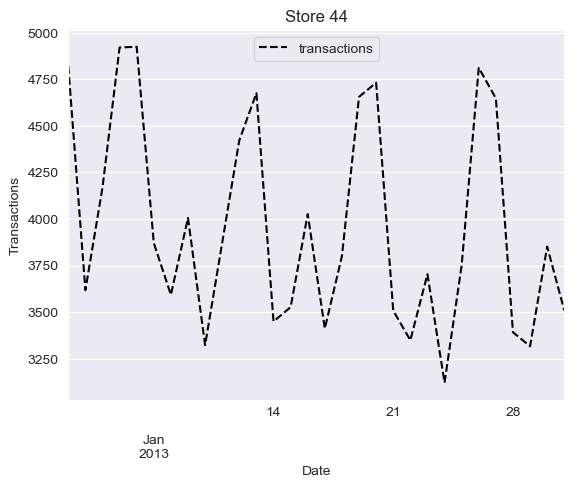

In [13]:
transactions.query('store_nbr == 44').set_index('date').loc['2013-01', 'transactions'].plot(
    title="Store 44",
    xlabel="Date",
    ylabel="Transactions",
    color="Black",
    style="--",
    grid=True
).legend(loc="upper center")

In [14]:
retail = pd.read_csv("../retail/retail_2016_2017.csv")
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [15]:
small_retail = retail.drop(['id','onpromotion'],axis=1)
small_retail.head()

,date,store_nbr,family,sales
0,2016-01-01,1,AUTOMOTIVE,0.0
1,2016-01-01,1,BABY CARE,0.0
2,2016-01-01,1,BEAUTY,0.0
3,2016-01-01,1,BEVERAGES,0.0
4,2016-01-01,1,BOOKS,0.0


In [16]:
# #small_retail_df= 
small_retail_df = small_retail[retail['family'].str.contains('BEVERAGES') | 
                          retail['family'].str.contains('AUTOMOTIVE') | 
                          retail['family'].str.contains('GROCERY')
                              ]
small_retail_df.head()

,date,store_nbr,family,sales
0,2016-01-01,1,AUTOMOTIVE,0.0
3,2016-01-01,1,BEVERAGES,0.0
12,2016-01-01,1,GROCERY I,0.0
13,2016-01-01,1,GROCERY II,0.0
33,2016-01-01,10,AUTOMOTIVE,0.0


<Axes: xlabel='date'>

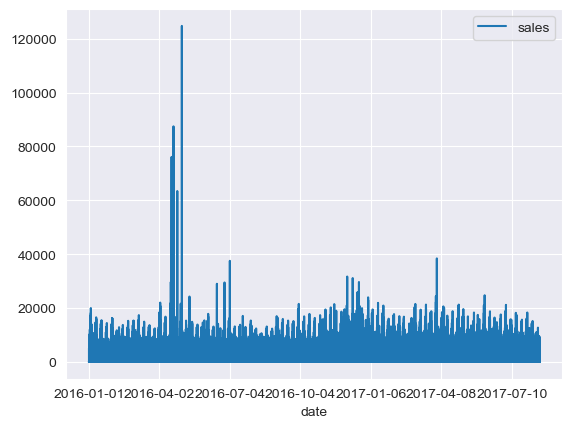

In [17]:
small_retail_df = small_retail_df.drop('store_nbr',axis=1)

small_retail_df.set_index('date').plot()

In [18]:
beverages_df = small_retail[retail['family'].str.contains('BEVERAGES')]

beverages_df = beverages_df.drop('store_nbr', axis=1)
                            
beverages_df.sample(5)

,date,family,sales
438078,2016-09-02,BEVERAGES,4172.0
732339,2017-02-15,BEVERAGES,4583.0
739500,2017-02-19,BEVERAGES,4555.0
957300,2017-06-22,BEVERAGES,2440.0
335118,2016-07-07,BEVERAGES,1291.0


<Axes: xlabel='date'>

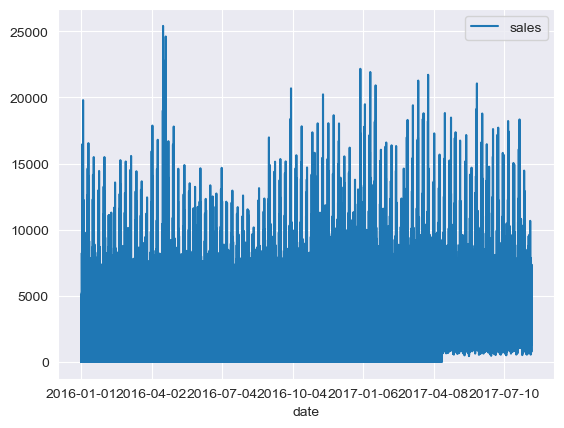

In [19]:
beverages_df.set_index("date").plot()

In [20]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: xlabel='store_nbr'>

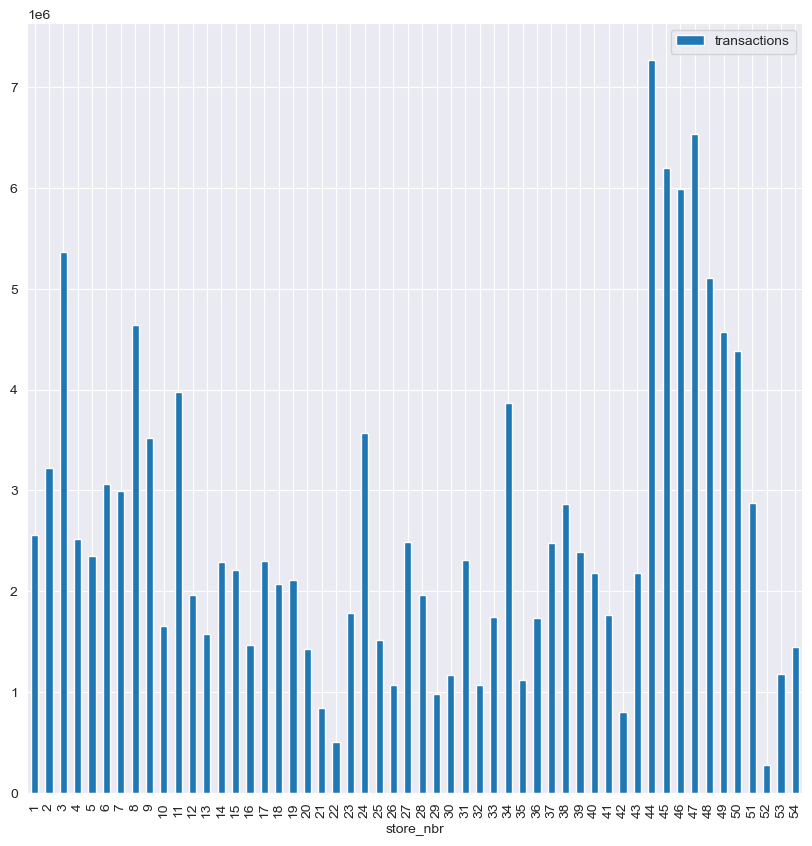

In [21]:
transactions.groupby(["store_nbr"]).agg({"transactions":"sum"}).plot.bar(figsize=(10,10))


<Axes: xlabel='store_nbr'>

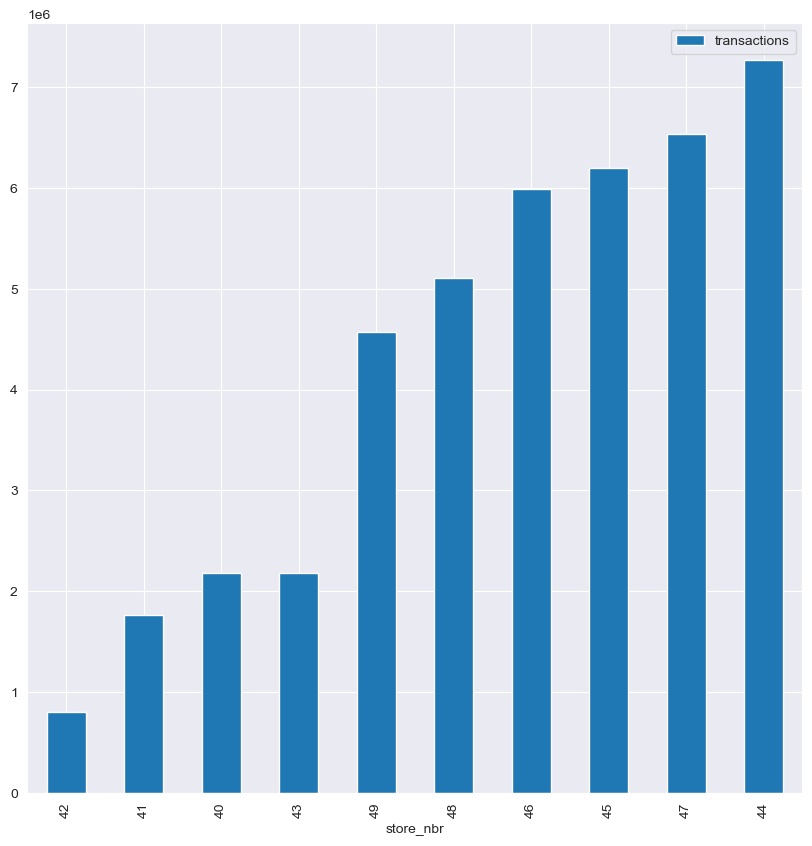

In [22]:
#adding ".query" to code above and filtering by a variable to set stores in the 40s
store_40s=list(range(40,50))

#by adding ".sort_values" you can arange by size
(transactions
 .query("store_nbr in @store_40s")
 .groupby(["store_nbr"])
 .agg({"transactions":"sum"})
 .sort_values(by="transactions")
 .plot.bar(figsize=(10,10)))

In [23]:
#store_40s=list(range(40,50))

(transactions
 .query("store_nbr in @store_40s and date.dt.month in [1,2,3]")
 .pivot_table(index=transactions["date"].dt.month,
             columns= transactions["store_nbr"],
             values="transactions",
             aggfunc="sum")
)#.plot.bar(stacked=True).legend(bbox_to_anchor=(1,1))

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071


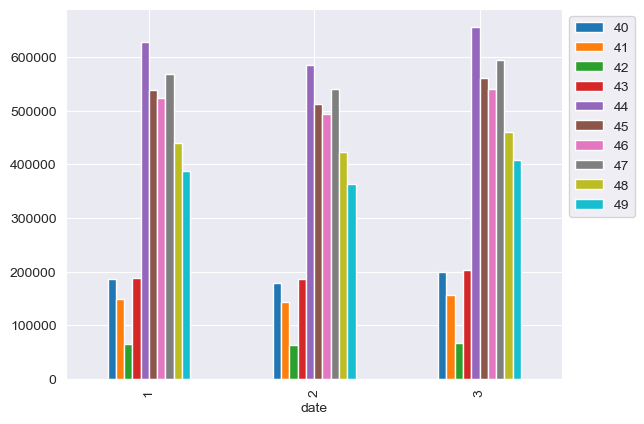

In [24]:
(transactions
 .query("store_nbr in @store_40s and date.dt.month in [1,2,3]")
 .pivot_table(index=transactions["date"].dt.month,#pivot table to show month as the index
             columns= transactions["store_nbr"],#columns are on the store numbers
             values="transactions",
             aggfunc="sum")#calculate sum of transactions
).plot.bar().legend(bbox_to_anchor=(1,1))

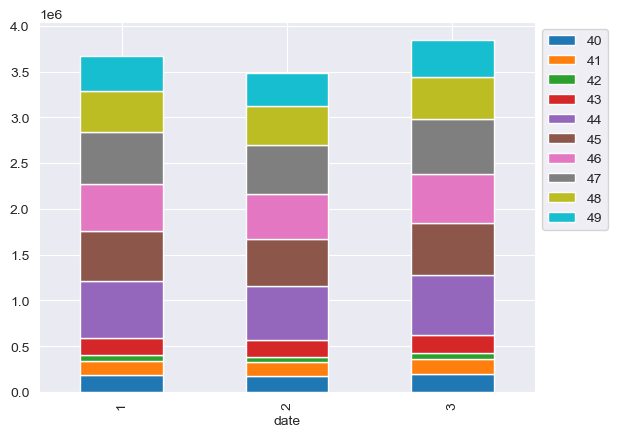

In [25]:
# to get stacked bar chart add "stacked=True" to parentheses afer "bar"
(transactions
 .query("store_nbr in @store_40s and date.dt.month in [1,2,3]")
 .pivot_table(index=transactions["date"].dt.month,#pivot table to show month as the index
             columns= transactions["store_nbr"],#columns are on the store numbers
             values="transactions",
             aggfunc="sum")#calculate sum of transactions
).plot.bar(stacked=True).legend(bbox_to_anchor=(1,1))

In [26]:
# for a 100% stacked bar, you need to get all rows to equal 100
#the lambda function does this...
(transactions
 .query("store_nbr in @store_40s and date.dt.month in [1,2,3]")
 .pivot_table(index=transactions["date"].dt.month,#pivot table to show month as the index
             columns= transactions["store_nbr"],#columns are on the store numbers
             values="transactions",#calculate sum of transactions
             aggfunc="sum").apply(lambda x: x*100/sum(x),axis=1)
)#.plot.bar(stacked=True).legend(bbox_to_anchor=(1,1))

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,5.052344,4.042938,1.763867,5.138606,17.117285,14.664028,14.238927,15.493529,11.958631,10.529844
2,5.143092,4.116339,1.790748,5.365099,16.760887,14.676416,14.150929,15.481162,12.115043,10.400287
3,5.194765,4.062374,1.760438,5.299201,17.045413,14.589956,14.046847,15.449572,11.968187,10.583246


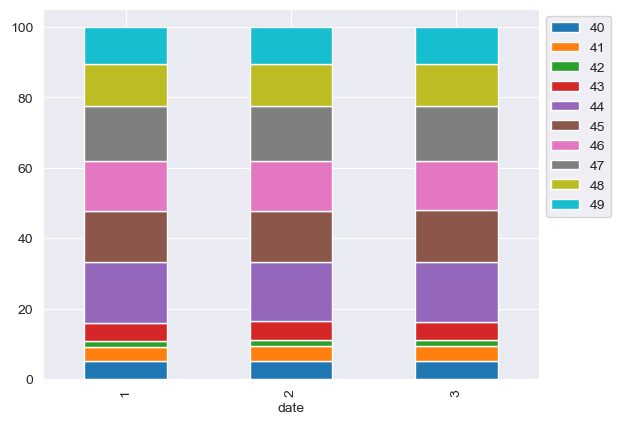

In [27]:
(transactions
 .query("store_nbr in @store_40s and date.dt.month in [1,2,3]")
 .pivot_table(index=transactions["date"].dt.month,#pivot table to show month as the index
             columns= transactions["store_nbr"],#columns are on the store numbers
             values="transactions",#calculate sum of transactions
             aggfunc="sum").apply(lambda x: x*100/sum(x),axis=1)
).plot.bar(stacked=True).legend(bbox_to_anchor=(1,1))

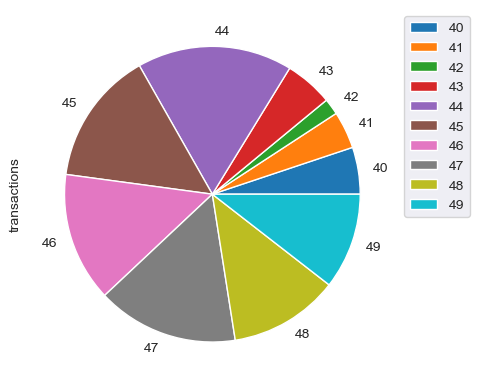

In [31]:
(transactions
 .query("store_nbr in @store_40s and date.dt.month in [1,2,3]")
 .groupby("store_nbr")
 .agg({"transactions":"sum"})
 .plot.pie(y="transactions")).legend(bbox_to_anchor=(1,1))

In [32]:
(transactions
 .query("store_nbr in @store_40s")
 .pivot_table(index=transactions["date"].dt.month,
             columns="store_nbr",
             values="transactions",
             aggfunc="sum"))

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071
4,194785,152869,66870,195502,637139,549474,535584,586216,454378,402373
5,208281,166079,69883,202376,671126,570956,554270,597380,469508,421413
6,196988,155688,67692,190156,631016,541302,516034,562559,436015,401579
7,203107,161205,70549,201074,645571,563700,531886,577574,454707,407053
8,182747,146306,63371,182532,596279,514143,485675,524983,419362,365448
9,151905,119653,64763,146055,516233,422178,412455,455021,353820,317871


<Axes: xlabel='44', ylabel='47'>

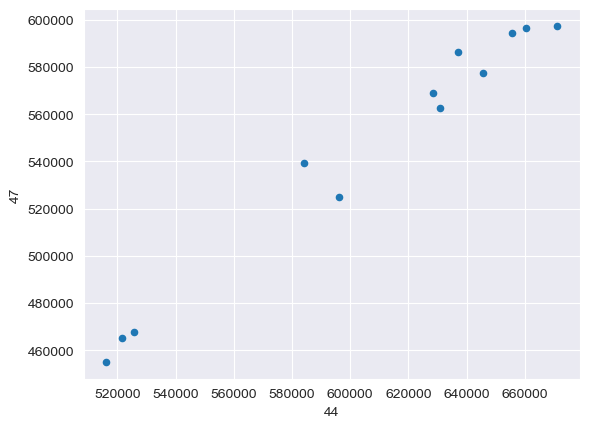

In [33]:
(transactions
 .query("store_nbr in @store_40s")
 .pivot_table(index=transactions["date"].dt.month,
             columns="store_nbr",
             values="transactions",
             aggfunc="sum")
.plot.scatter(x=44, y=47))

In [34]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: ylabel='Frequency'>

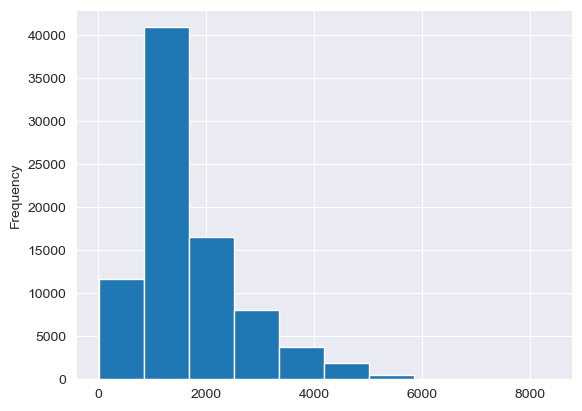

In [35]:
transactions.loc[:,"transactions"].plot.hist()

<Axes: ylabel='Frequency'>

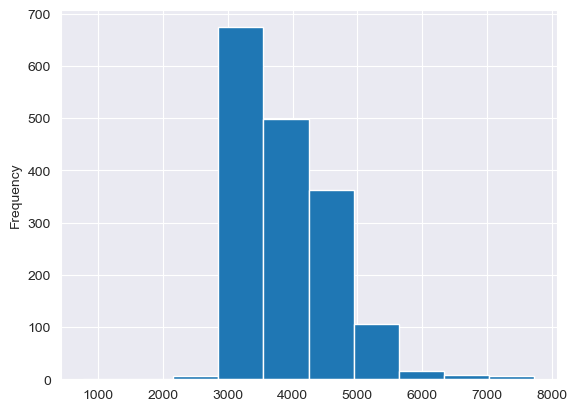

In [36]:
transactions.loc[transactions['store_nbr']==47,"transactions"].plot.hist()

In [ ]:
transactions.loc[:,"transactions"].plot.hist()